<a href="https://colab.research.google.com/github/nalrob/Modelo_de_Negocios/blob/main/MLE_MDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install researchpy

LINEAR MIXED-EFFECTS REGRESSION USING STATSMODELS

In [ ]:
data = pd.read_csv('/content/LifeExpectancyData.csv')

In [ ]:
rp.codebook(data)

Variable: Country    Data Type: object 

 Number of Obs.: 2938 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 193 

 Data Values and Counts: 
 
                                               Values  Frequency
                                         Afghanistan         16
                                             Albania         16
                                             Algeria         16
                                              Angola         16
                                 Antigua and Barbuda         16
                                           Argentina         16
                                             Armenia         16
                                           Australia         16
                                             Austria         16
                                          Azerbaijan         16
                                             Bahamas         16
                                             Bahrain    

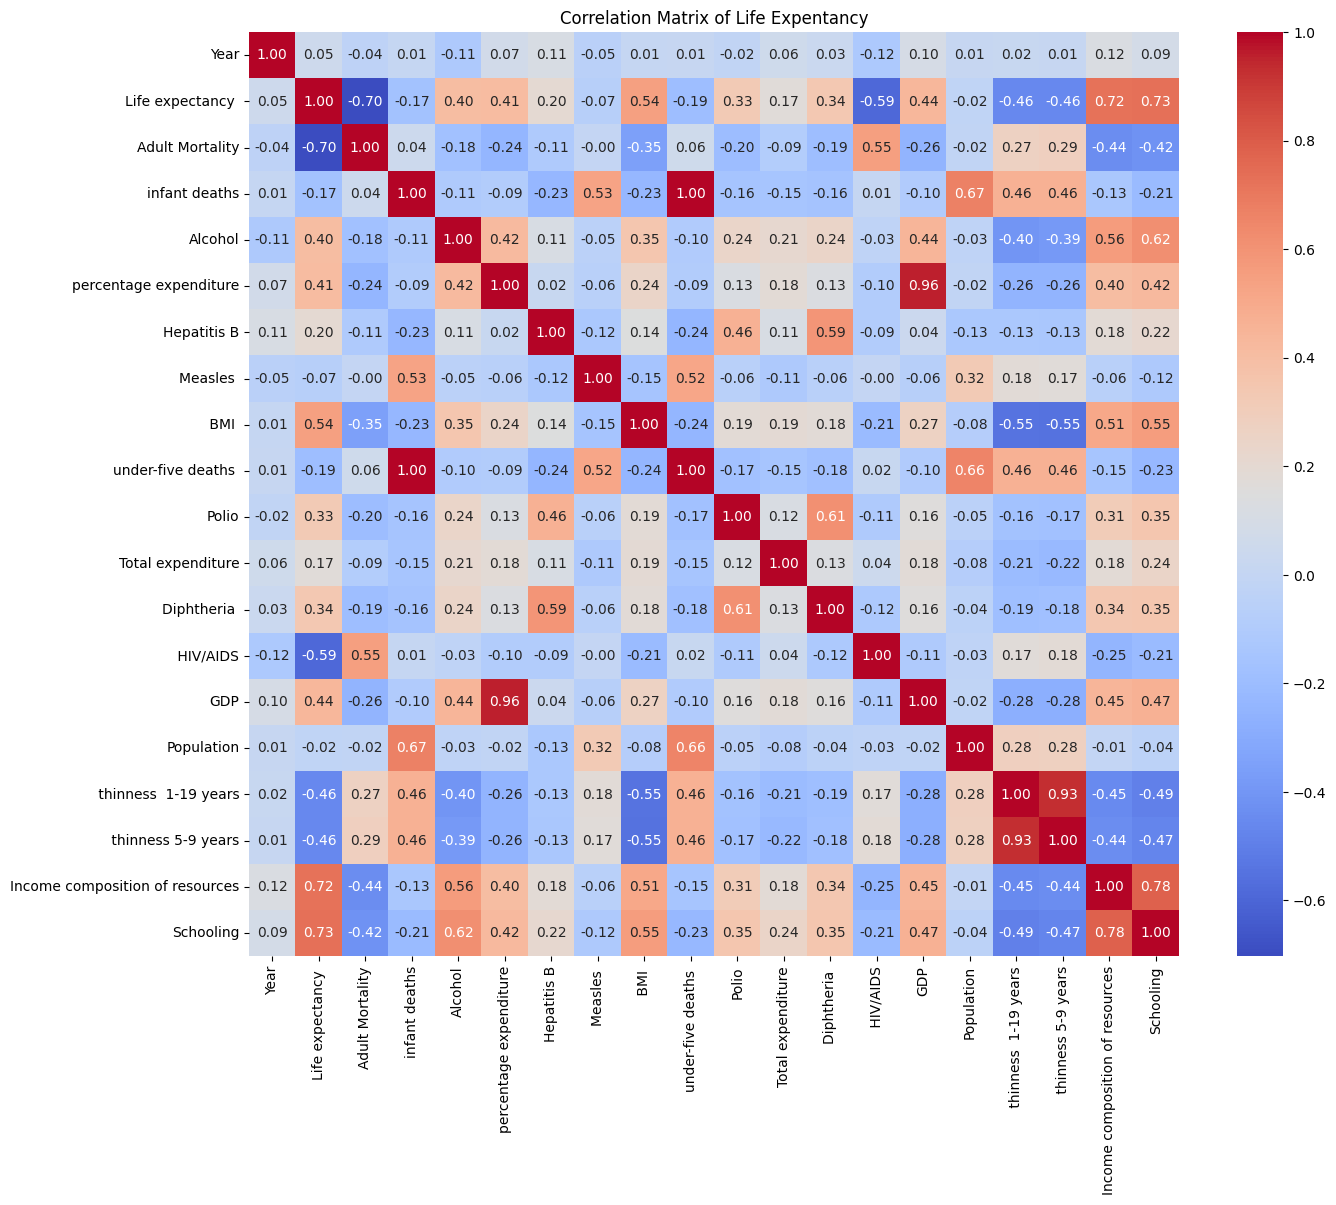

In [ ]:
import seaborn as sns

# Calcular la matriz de correlación
matriz_correlacion_df = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacion_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Life Expectancy')
plt.show()


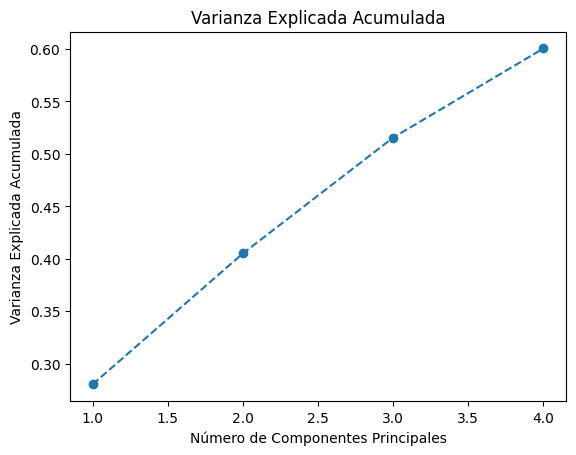

                       Componente_1  Componente_2  Componente_3  Componente_4
Year                      -0.021968      0.060845     -0.071310     -0.288609
Adult Mortality            0.229684     -0.282929     -0.131087      0.432519
Alcohol                   -0.281922      0.156924      0.134227      0.415560
Hepatitis B               -0.190832      0.061417     -0.538307     -0.054184
Measles                    0.144554      0.389878      0.108034      0.099406
 BMI                      -0.322134      0.050477      0.199997     -0.029962
under-five deaths          0.257583      0.485268      0.123438      0.110914
Polio                     -0.226541      0.188517     -0.448107      0.076461
Total expenditure         -0.163931     -0.025531      0.001133      0.257915
Diphtheria                -0.235401      0.191550     -0.496231      0.057385
 HIV/AIDS                  0.144223     -0.241544     -0.090640      0.622946
GDP                       -0.233115      0.170746      0.162339 

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongo que 'data' es tu conjunto de datos
df_nul = data.dropna()

# Selecciona solo columnas numéricas
df = df_nul.select_dtypes(include=['float64', 'int64'])

# Separar la variable objetivo ('Life expectancy ') del resto de las variables
X = df.drop(columns=['Life expectancy ','Income composition of resources','infant deaths','percentage expenditure'])
y = df['Life expectancy ']

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=4)
df_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con resultados PCA
df_pca_resultado = pd.DataFrame(df_pca, columns=[f'Componente_{i+1}' for i in range(df_pca.shape[1])])

# Varianza explicada acumulada
varianza_explicada = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulada
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

# Obtener las componentes principales
componentes_variables = pca.components_

# Crear DataFrame con impacto de variables en componentes
df_impacto_variables = pd.DataFrame(componentes_variables.T, columns=[f'Componente_{i+1}' for i in range(df_pca.shape[1])], index=X.columns)
print(df_impacto_variables)


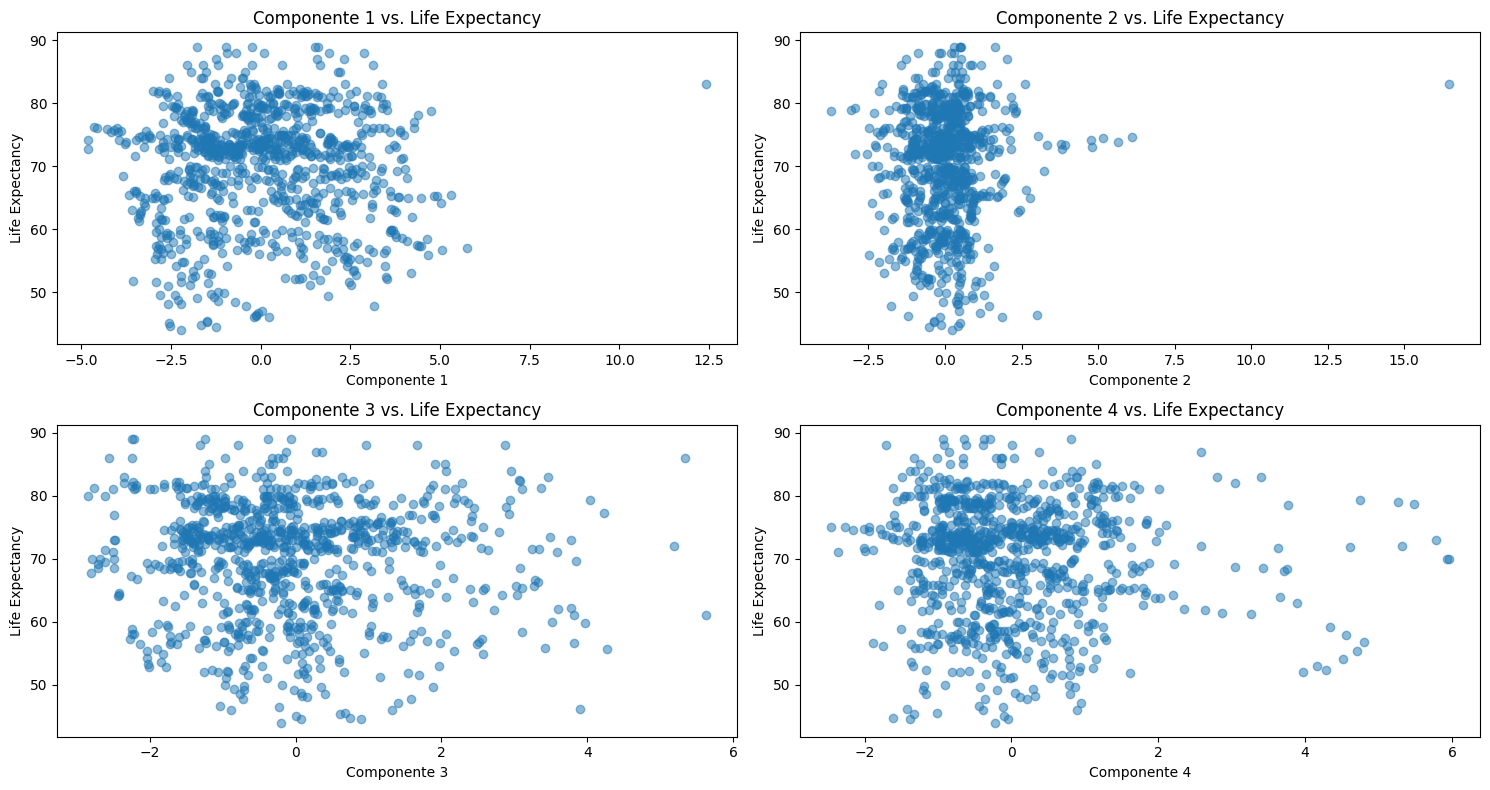

In [ ]:
import matplotlib.pyplot as plt

# Crear un DataFrame con las componentes principales y la variable explicada
df_resultado = pd.concat([df_pca_resultado, df_nul['Life expectancy ']], axis=1)

# Graficar todas las componentes en un solo gráfico
plt.figure(figsize=(15, 8))

num_componentes = df_pca_resultado.shape[1]

for i in range(num_componentes):
    plt.subplot(2, num_componentes // 2, i + 1)
    plt.scatter(df_resultado[f'Componente_{i+1}'], df_resultado['Life expectancy '], alpha=0.5)
    plt.title(f'Componente {i+1} vs. Life Expectancy')
    plt.xlabel(f'Componente {i+1}')
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()


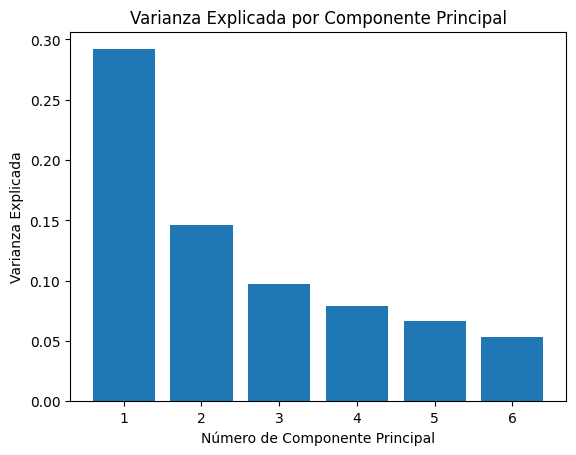

In [ ]:
# Graficar la varianza explicada por componente principal
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.show()


In [ ]:
data = pd.read_csv('/content/LifeExpectancyData.csv')
data.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df_nul = data.loc[:, ['LifeExpectancy', 'Year', 'Country','Adult Mortality','Alcohol','Hepatitis B','Measles ','under-five deaths ', 'Polio','Diphtheria ',' HIV/AIDS', 'Population', ' thinness  1-19 years', 'Schooling']]

In [ ]:
df = df_nul.dropna()

In [ ]:
nans=pd.isnull(df).sum()
nans

LifeExpectancy           0
Year                     0
Country                  0
Adult Mortality          0
Alcohol                  0
Hepatitis B              0
Measles                  0
under-five deaths        0
Polio                    0
Diphtheria               0
 HIV/AIDS                0
Population               0
 thinness  1-19 years    0
Schooling                0
dtype: int64

In [ ]:
from sklearn import preprocessing
df["year_scaled"] = preprocessing.scale(df.Year.values)

<ipython-input-167-bab44166690e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_scaled"] = preprocessing.scale(df.Year.values)


In [ ]:
df.head(5)

,LifeExpectancy,Year,Country,Adult Mortality,Alcohol,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Schooling,year_scaled
0,65.0,2015,Afghanistan,263.0,0.01,65.0,1154,83,6.0,65.0,0.1,33736494.0,17.2,10.1,1.749954
1,59.9,2014,Afghanistan,271.0,0.01,62.0,492,86,58.0,62.0,0.1,327582.0,17.5,10.0,1.505596
2,59.9,2013,Afghanistan,268.0,0.01,64.0,430,89,62.0,64.0,0.1,31731688.0,17.7,9.9,1.261239
3,59.5,2012,Afghanistan,272.0,0.01,67.0,2787,93,67.0,67.0,0.1,3696958.0,17.9,9.8,1.016881
4,59.2,2011,Afghanistan,275.0,0.01,68.0,3013,97,68.0,68.0,0.1,2978599.0,18.2,9.5,0.772523


In [ ]:
#!conda install -c conda-forge statsmodels -y
import statsmodels.api as sm
import statsmodels.formula.api as smf

# construct our model, with our county now shown as a group
md = smf.mixedlm("LifeExpectancy ~ year_scaled", df, groups=df["Country"])
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: LifeExpectancy
No. Observations: 1660    Method:             REML          
No. Groups:       133     Scale:              3.8097        
Min. group size:  1       Log-Likelihood:     -3833.6284    
Max. group size:  16      Converged:          Yes           
Mean group size:  12.5                                      
-------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     68.479     0.782  87.607  0.000  66.946  70.011
year_scaled    1.357     0.050  27.014  0.000   1.258   1.455
Group Var     80.892     5.344                               



<ipython-input-172-afd1d1c16401>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 0, 'Residuals')

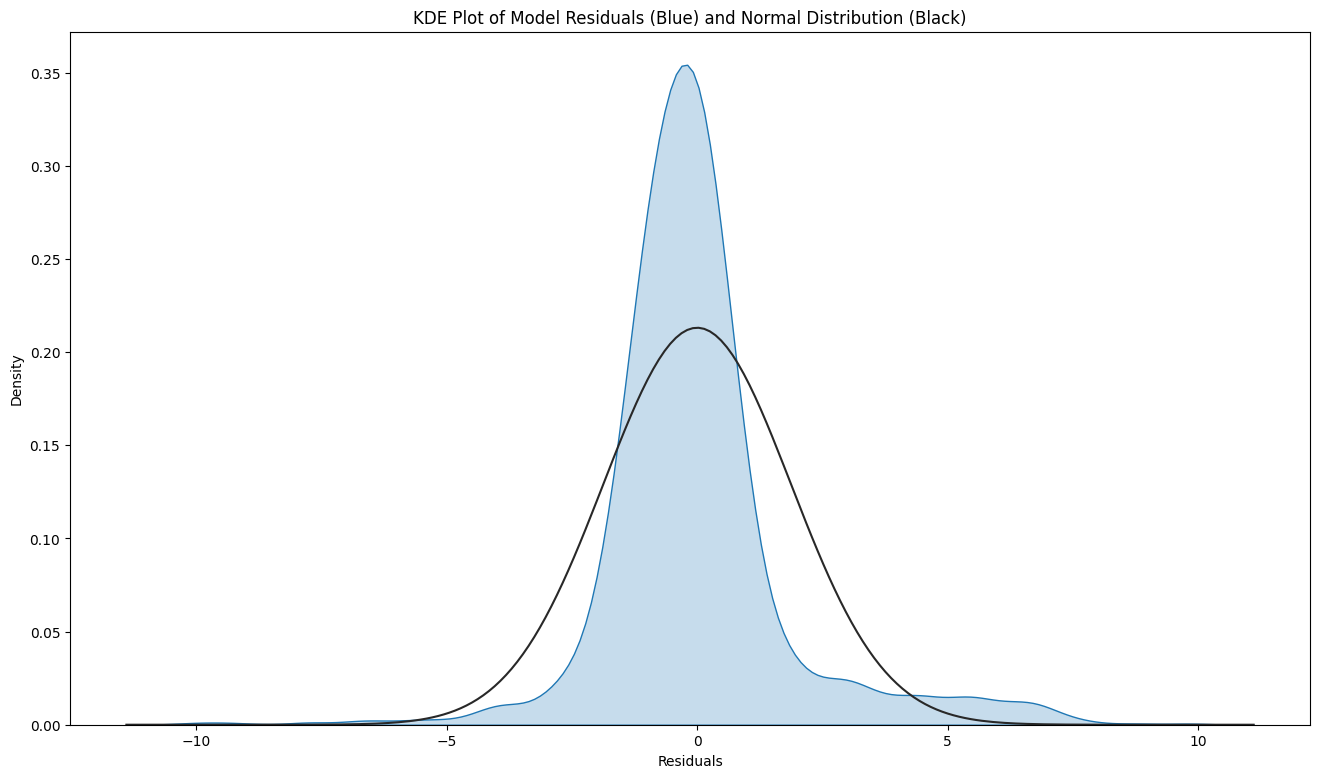

In [ ]:
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

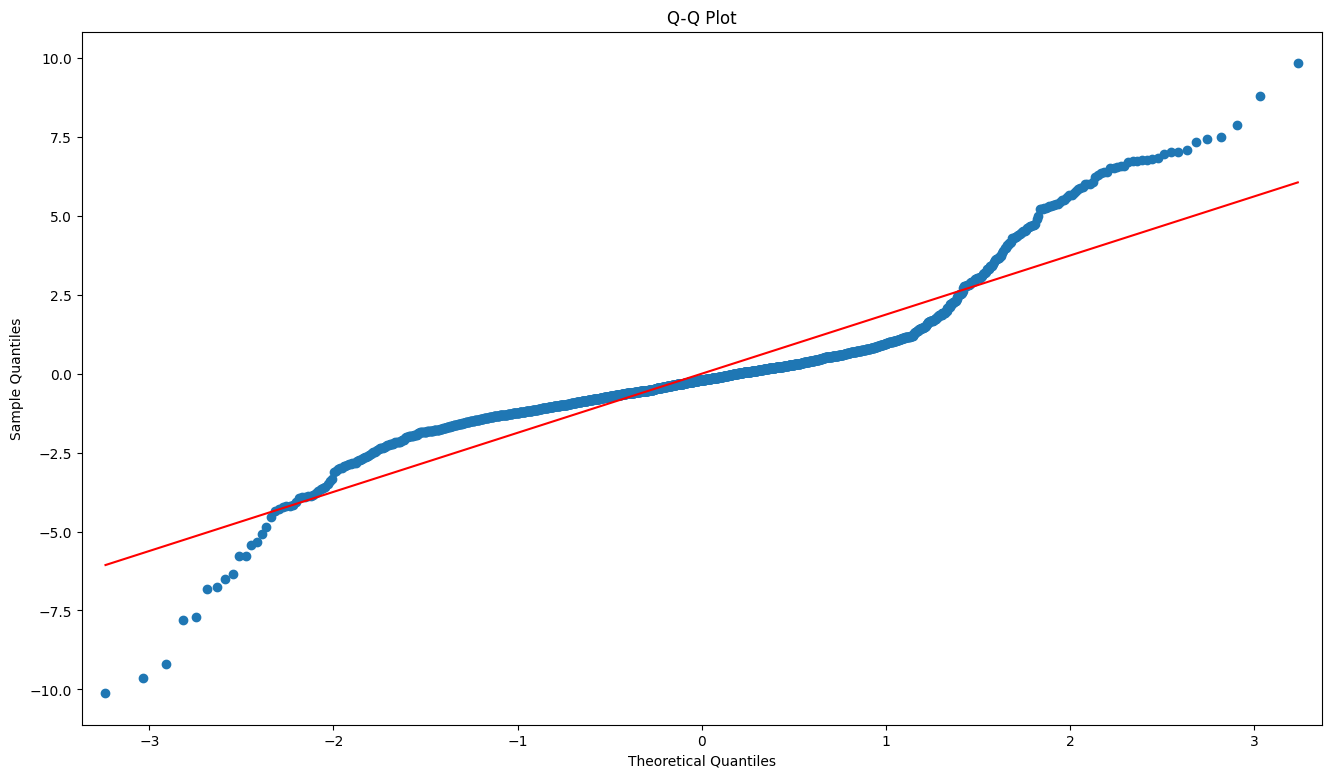

In [ ]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(mdf.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")
